# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [68]:
NAME = "Luk Letif"
COLLABORATORS = ""

---

# Part 1 (100 points total)

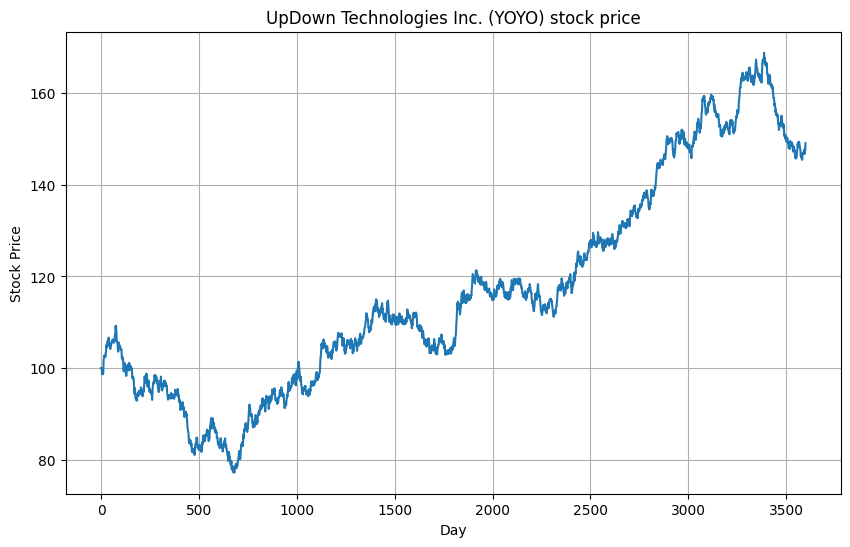

In [69]:
import numpy as np
import matplotlib.pyplot as plt
def generate_synthetic_stock_data(n_days: int, initial_price: float, order: int, noise_std: float, seed: int) -> np.array:
    # Seed for reproducibility
    np.random.seed(seed)
    
    # Initialize stock prices
    stock_prices = np.zeros(n_days)
    stock_prices[:order] = initial_price
    
    # Autoregressive coefficients for linear and quadratic terms - choosing smaller values
    linear_coefficients = np.random.uniform(-0.05, 0.05, order)
    quadratic_coefficients = np.random.uniform(-0.005, 0.005, order)
    
    # Generate stock prices with P_t-1 as the intercept
    for t in range(order, n_days):
        intercept = stock_prices[t-1]
        linear_term = np.sum(linear_coefficients * (stock_prices[t-order:t] - intercept))
        quadratic_term = np.sum(quadratic_coefficients * (stock_prices[t-order:t] - intercept)**2)
        
        # Adding a noise term with specified standard deviation
        noise = np.random.normal(0, noise_std)
        
        # Calculate stock price with clipping
        stock_prices[t] = np.clip(intercept + linear_term + quadratic_term + noise, 1, None)
    
    return stock_prices

# Test the function with a specific seed
test_stock_data = generate_synthetic_stock_data(3600, 100, 5, 0.5, 50)

# Plotting the generated stock prices with a specific seed
plt.figure(figsize=(10,6))
plt.plot(test_stock_data)
plt.title('UpDown Technologies Inc. (YOYO) stock price')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

### Question 1 (10 points)

Given a time series of stock prices $S = [s_1, s_2, ..., s_n]$, where $s_i$ is the stock price at time $i$, your task is to create a feature matrix $X$ and target vector $y$ for training a regression model. The feature matrix $X$ should be constructed such that each row corresponds to a window of $k$ consecutive stock prices, and the target vector $y$ should correspond to the stock price immediately following each window. Mathematically, the $i$-th row in $X$ and $y$ should be

$$
X_i = [s_i, s_{i+1}, ..., s_{i+k-1}] \quad \text{and} \quad y_i = s_{i+k}
$$

for $i = 1$ to $n-k$, where $n$ is the total number of observations in the time series, and $k$ is the window size. Implement a function `create_features` that takes a numpy array of stock prices and an integer $k$ as input and returns the feature matrix $X$ and target vector $y$. You should use the `numpy.lib.stride_tricks.sliding_window_view` function to create the feature matrix.

Function signature: **`def create_features(time_series: np.array, k: int) -> (np.array, np.array):`**

### Constraints:

- The `time_series` numpy array will have at least $k+1$ elements.
- $k$ is a positive integer less than the length of the `time_series`.

In [70]:
import numpy as np

def create_features(time_series: np.array, k: int) -> (np.array, np.array):
    # Create a sliding window view of the time series with window size k
    # YOUR CODE HERE
    # raise NotImplementedError()
    X_full = np.lib.stride_tricks.sliding_window_view(time_series, window_shape=k)
    
    # or $i = 1$ to $n-k$, where $n$ is the total number of observations in the time series,
    X = X_full[:len(time_series)-k]
    
    # y_i = s_{i+k}
    y = time_series[k:]
    return X, y

In [71]:
# Test the solution with a sample time series and window size
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
k = 3
X, y = create_features(time_series, k)
X, y  # Display the result to check if the function is working as expected

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]),
 array([ 4,  5,  6,  7,  8,  9, 10]))

In [72]:
# 10 points
def test_create_features():
    # Test 1
    time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    k = 3
    X, y = create_features(time_series, k)
    assert np.array_equal(X, np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8], [7, 8, 9]])), f'Error: {X}'
    assert np.array_equal(y, np.array([4, 5, 6, 7, 8, 9, 10])), f'Error: {y}'
    
    # Test 2
    time_series = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    k = 4
    X, y = create_features(time_series, k)
    assert np.array_equal(X, np.array([[ 2,  4,  6,  8], [ 4,  6,  8, 10], [ 6,  8, 10, 12], [ 8, 10, 12, 14], [10, 12, 14, 16], [12, 14, 16, 18]])), f'Error: {X}'
    assert np.array_equal(y, np.array([10, 12, 14, 16, 18, 20])), f'Error: {y}'
    
    # Test 3
    time_series = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
    k = 2
    X, y = create_features(time_series, k)
    assert np.array_equal(X, np.array([[ 3,  6], [ 6,  9], [ 9, 12], [12, 15], [15, 18], [18, 21], [21, 24], [24, 27]])), f'Error: {X}'
    assert np.array_equal(y, np.array([ 9, 12, 15, 18, 21, 24, 27, 30])), f'Error: {y}'
    
test_create_features()  # If this raises no errors, the tests passed


### Question 2 (10 points)

In this part of the exercise, you are tasked with implementing a polynomial expansion of the feature matrix $X$. The expanded feature matrix $X_{\text{poly}}$ should have each feature in $X$ raised to the powers from 1 to $m$, where $m$ is the specified degree of the polynomial. Each feature should be transformed independently, meaning there should be no interaction terms between different features. 

For instance, if $X$ is a feature matrix:

$$
X = 
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
x_{31} & x_{32} 
\end{bmatrix}
$$

and $m=3$, the expanded feature matrix $X_{\text{poly}}$ would be:

$$
X_{\text{poly}} = 
\begin{bmatrix}
x_{11} & x_{11}^2 & x_{11}^3 & x_{12} & x_{12}^2 & x_{12}^3 \\
x_{21} & x_{21}^2 & x_{21}^3 & x_{22} & x_{22}^2 & x_{22}^3 \\
x_{31} & x_{31}^2 & x_{31}^3 & x_{32} & x_{32}^2 & x_{32}^3 
\end{bmatrix}
$$

Implement a function named `polynomial_expansion` with the following signature:

```python
def polynomial_expansion(X: np.array, degree: int) -> np.array:
    pass
```
### Note
Ensure that the function is efficient and avoids using loops if possible. Utilize Numpy's broadcasting and vectorization features to handle the operations on the matrix efficiently.

In [73]:
import numpy as np

def polynomial_expansion(X: np.array, degree: int) -> np.array:
    # YOUR CODE HERE
    # raise NotImplementedError()
    #intialize the matrix
    polynomial_expansion_features = []
    
    # For each column in X
    for column in range(X.shape[1]): # shape[1]
        for deg in range(1, degree + 1):
            polynomial_expansion_features.append(X[:, column]**deg)
    
    X_poly = np.column_stack(polynomial_expansion_features) # TODO: better stack
    return X_poly

In [74]:
# Test the solution with a sample feature matrix and degree
X = np.array([[1, 2], [3, 4], [5, 6]])
degree = 3
X_poly = polynomial_expansion(X, degree)
X_poly  # Display the result to check if the function is working as expected

array([[  1,   1,   1,   2,   4,   8],
       [  3,   9,  27,   4,  16,  64],
       [  5,  25, 125,   6,  36, 216]])

In [75]:
# 10 pts
def test_polynomial_expansion():
    # Test 1
    X = np.array([[1, 2], [3, 4], [5, 6]])
    degree = 3
    X_poly = polynomial_expansion(X, degree)
    expected = np.array([[  1,   1,   1,   2,   4,   8],
                         [  3,   9,  27,   4,  16,  64],
                         [  5,  25, 125,   6,  36, 216]])
    assert np.array_equal(X_poly, expected), f'Error: {X_poly}'
    
    # Test 2
    X = np.array([[2, 3], [4, 5]])
    degree = 2
    X_poly = polynomial_expansion(X, degree)
    expected = np.array([[ 2,  4,  3,  9],
                         [ 4, 16,  5, 25]])
    assert np.array_equal(X_poly, expected), f'Error: {X_poly}'
    
    # Test 3
    X = np.array([[1, 2, 3], [4, 5, 6]])
    degree = 4
    X_poly = polynomial_expansion(X, degree)
    expected = np.array([[  1,   1,   1,   1,   2,   4,   8,  16,   3,   9,  27,  81],
                         [  4,  16,  64, 256,   5,  25, 125, 625,   6,  36, 216, 1296]])
    assert np.array_equal(X_poly, expected), f'Error: {X_poly}'

test_polynomial_expansion()  # If this raises no errors, the tests passed

### Question 3 (20 points)

Goldman Sucks, a fictitious financial company, is utilizing a unique loss function for training their regression models. This loss function combines the Mean Squared Error (MSE) and a penalization component tailored for time series data where features are derived from a lag matrix with a polynomial expansion.

The total loss $L$ is calculated as follows:

$$
L(w, X, y) = \text{MSE}(w, X, y) + P(w, k, m, \lambda, \beta)
$$

where:
- $w$ is the vector of model weights, where the dimensions 0 is the intercept.
- $X$ is the feature matrix.
- $y$ is the target vector.
- $k$ is the window size of the lag matrix.
- $m$ is the degree of polynomial expansion.
- $\lambda$ is the penalization parameter.
- $\beta$ controls the rate of exponential decay for the influence of past steps.

The MSE part is defined as:

$$
\text{MSE}(w, X, y) = \frac{1}{n} \sum_{i=1}^n (y_i - w_0 - \sum_{j=1}^{k \times m} w_j x_{ij})^2
$$

The penalization component \(P\) is defined as:

$$
P(w, k, m, \lambda, \beta) = \lambda \sum_{i=1}^k \sum_{j=1}^m w_{(i-1) \times m + j}^2 \exp\left(-\frac{i-1}{\beta}\right)
$$

Implement a function `goldman_sucks_loss` that computes this loss. The function should have the following signature:

```python
def goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> float:
    pass
```

### Constraints:

- All input arrays have appropriate dimensions: $X$ is $n \times (k \times m)$, $y$ is $n \times 1$, and $w$ is a vector of $k \times m + 1$ elements.
- $k, m > 0$, $\lambda, \beta > 0$.

In [76]:
def goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> float:
    # Compute the MSE part of the loss
    # YOUR CODE HERE
    # raise NotImplementedError()
    # Predicted values
    y_pred = w[0] + np.dot(X, w[1:])
    
    # MSE:\text{MSE}(w, X, y) = \frac{1}{n} \sum_{i=1}^n (y_i - w_0 - \sum_{j=1}^{k \times m} w_j x_{ij})^2
    mse = np.mean((y - y_pred)**2)
    
    # P(w, k, m, \lambda, \beta) = \lambda \sum_{i=1}^k \sum_{j=1}^m w_{(i-1) \times m + j}^2 \exp\left(-\frac{i-1}{\beta}\right)
    sigma_p = 0
    for i in range(1, k + 1):
        for j in range(1, m + 1):
            _ = (i - 1) * m + j
            sigma_p += (w[_]**2)*np.exp(-(i - 1)/beta) #w[1:]
            
    penalty = lambda_*sigma_p
    
    # total loss:L(w, X, y) = \text{MSE}(w, X, y) + P(w, k, m, \lambda, \beta)
    total_loss = mse + penalty

    return total_loss

In [77]:
## 20 pts
def test_loss_function():
    # Test the solution with sample data
    w = np.array([0.5, 0.2, 0.3])
    X = np.array([[2, 3], [4, 5], [6, 7]]) # you should always add the bias when computing the loss
    y = np.array([3, 6, 9])
    k = 1  # lag window size
    m = 2  # degree of polynomial expansion
    lambda_ = 0.01  # penalization parameter
    beta = 2  # controls the rate of exponential decay
    
    loss = goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    np.testing.assert_almost_equal(loss, 12.907966666666665)
test_loss_function()

### Question 4 (20 points)

In this part of the exercise, you will be computing the gradient of the loss function defined by Goldman Sucks with respect to the weights $w$. This is a crucial step for optimizing the loss function to find the best set of weights for the regression model.

Your task is to implement a function named `d_goldman_sucks_loss` that calculates the gradient of the loss function $L$ with respect to the weights $w$. Recall the loss function:

$$
L(w, X, y) = \text{MSE}(w, X, y) + P(w, k, m, \lambda, \beta)
$$

You need to find:

$$
\frac{\partial L}{\partial w}
$$

The function should have the following signature:

```python
def d_goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> np.array:
    pass
```

### Constraints:

- All input arrays have appropriate dimensions: $X$ is $n \times (k \times m)$, $y$ is $n \times 1$, and $w$ is a vector $(k \times m + 1)$.
- $k, m > 0$, $\lambda, \beta > 0$.

In [78]:
def d_goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> np.array:
    n = len(y)

    # YOUR CODE HERE
    # raise NotImplementedError()
    # Predicted values 
    y_pred = w[0] + np.dot(X, w[1:])
    
    # y- y_pred
    loss = y - y_pred
    d_mse_zero = -2 * np.mean(loss)
    d_mse_rest = -2 / n * np.dot(loss, X)
    

    # sigma_p = 0
    # for i in range(1, k + 1):
    #     for j in range(1, m + 1):
    #         _ = (i - 1) * m + j
    #         sigma_p += (w[_]**2)*np.exp(-(i - 1)/beta) #w[1:]
            
    # penalty = lambda_*sigma_p
    _ = []
    for j in range(1, k * m + 1):
        exp_term = -((j-1)//m)/beta
        sigma_p_exp = np.exp(exp_term)
        sigma_p = 2*lambda_*w[j]*sigma_p_exp
        _.append(sigma_p)
    d_penalty = np.array(_) # TODO: element wise
    
    # Combine gradients
    d_total = np.concatenate(([d_mse_zero], d_mse_rest + d_penalty)) #TODO: [d_mse_zero]
    return d_total

In [79]:
# Test the solution with sample data
w = np.array([0.5, 0.2, 0.3])
X = np.array([[2, 3], [4, 5], [6, 7]])
y = np.array([3, 6, 9])
k = 1  # lag window size
m = 2  # degree of polynomial expansion
lambda_ = 0.01  # penalization parameter
beta = 2  # controls the rate of exponential decay
loss = goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
print(loss)
gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
gradient  # Display the result to check if the function is working as expected

12.907966666666665


array([ -6.4       , -30.92933333, -37.32733333])

In [80]:
def test_d_goldman_sucks_loss():
    # Test 1
    w = np.array([0.5, 0.2, 0.3])
    X = np.array([[2, 3], [4, 5], [6, 7]])
    y = np.array([3, 6, 9])
    k = 1
    m = 2
    lambda_ = 0.01
    beta = 2
    gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    expected = np.array([ -6.39, -30.92933333, -37.33333333])
    assert np.allclose(gradient, expected, atol=1e-2), f"Error: {gradient}"
    
    # Test 2
    w = np.array([1, 0.5, 0.3, 0.2])
    X = np.array([[2, 3, 4], [3, 5, 7], [4, 7, 10]])
    y = np.array([5, 8, 11])
    k = 3
    m = 1
    lambda_ = 0.05
    beta = 5
    gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    expected = np.array([ -5.2, -17.28333333, -29.44210474, -41.5865936 ])
    assert np.allclose(gradient, expected, atol=1e-2), f"Error: {gradient}"
    
    # Test 3
    w = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
    X = np.array([[2, 3, 4, 5], [4, 6, 8, 10], [5, 7, 9, 11]])
    y = np.array([5, 10, 12])
    k = 1
    m = 4
    lambda_ = 0.1
    beta = 1
    gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    expected = np.array([1.13333333, 4.10666667, 6.06, 8.01333333, 9.96666667])
    assert np.allclose(gradient, expected, atol=1e-2), f"Error: {gradient}"

test_d_goldman_sucks_loss()  # If this raises no errors, the tests passed

### Question 5 (25 points)

"UpDown Technologies Inc." (Stock Ticker: "YOYO") has seen its stock price fluctuate over the past 10 years. You have been provided with a dataset containing the daily closing prices of YOYO for these 10 years (360 trading days per year).

Your task is to develop a model to predict the stock price of YOYO. You will need to:

- Use the `test_stock_data` variable to obtain the stop price
- Use a window size of 5 and polynomial degree of 2 to create the dataset
- Use 60% for training, 20% for validation, and 20% for testing
- Create a function that runs gradient descent. The signature should be `def gradient_descent(X, y, lr=0.00001, epochs=1000, lambda_=0.001, beta=1)` and returns the final solution and history of loss.
- Train a model using gradient descent and use the Goldman Sucks loss function from the previous questions.
- Make sure to plot how the loss function changes over iterations for both the training.
- Play with the learning rate so that the loss decreases after going the dataset 10 times (10 epochs) (Hint: you might need to use very small learning rates)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Given data
test_stock_data = generate_synthetic_stock_data(3600, 100, 5, 0.5, 50)

In [82]:
# Generate features and targets
# 5 pts
# YOUR CODE HERE
# raise NotImplementedError()
#List initial
X = []
y = []

for i in range(5, len(test_stock_data)):
    window = test_stock_data[i-5:i].reshape(-1, 1)  
    polynomial_degree = polynomial_expansion(window, 2)
    X.append(polynomial_degree.flatten())   # not working 
    y.append(test_stock_data[i])

X = np.array(X) #TODO: convert back 
y = np.array(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the size of each dataset to verify the split
print(f"Training Data Size: {X_train.shape[0]}")
print(f"Validation Data Size: {X_valid.shape[0]}")
print(f"Test Data Size: {X_test.shape[0]}")

Training Data Size: 2157
Validation Data Size: 719
Test Data Size: 719


In [83]:
# 10 pts
# Gradient Descent implementation
def gradient_descent(X, y, lr=0.00001, epochs=1000, lambda_=0.001, beta=1):    
    m, n = X.shape
    w = np.random.randn(n+1)*0.001
    w[0] = y.mean()
    # YOUR CODE HERE
    # raise NotImplementedError()

    X = np.insert(X, 0, 1, axis=1)
    
    loss_history = []
    
    for epoch in range(epochs):
        #  gradient use the Goldman Sucks loss function from the previous questions.
        gradient = d_goldman_sucks_loss(w, X, y, 5, 2, lambda_, beta)
        
        # Update w
        w -= lr*gradient
        
        # loss use the Goldman Sucks loss function from the previous questions.
        loss = goldman_sucks_loss(w, X, y, 5, 2, lambda_, beta)
        loss_history.append(loss)
    return w, loss_history

In [84]:
w, loss_history = gradient_descent(X_train, y_train, lr=0.01, epochs=10, lambda_=0.001, beta=1)


ValueError: shapes (2157,11) and (10,) not aligned: 11 (dim 1) != 10 (dim 0)

In [ ]:
# 10 pts
# Find the a good learning rate and plot the solution for 10 epochs
# YOUR CODE HERE
raise NotImplementedError()
plt.plot(loss)

# Question 6: (15 pts)

Fit all combinations of parameters $\lambda \in \{0, 0.01, 0.1, 1.\}$ and $\beta \in \{0.01, 0.1, 1, 2\}$ for training different models. Measure the RMSE in validation and create a Pandas table with the results, where the first column is "lambda", the second is "beta", and the third is the RMSE on validation. Pick the best model, and measure its RMSE on testing.

In [ ]:
# the following function measures the Root mean squared error
def rmse(X, y, w):
    X = X.copy()
    X = np.c_[np.ones((X.shape[0], 1)), X]  # add 1 as first column for bias term
    y_pred = X.dot(w)
    return np.sqrt(((y-y_pred)**2).mean())

In [ ]:
# 10 points
import pandas as pd
lambdas = [0, 0.01, 0.1, 1]
betas = [0.01, 0.1, 1, 2]
# YOUR CODE HERE
raise NotImplementedError()

**(5 pts) What can you comment about the beta parameter for $\lambda$ and $\beta$?**

YOUR ANSWER HERE